Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Reading data from a dataset and storing in a numpy array.

In [ ]:
dataset = pd.read_csv('Dataset.csv',header = None)
X = dataset.iloc[:,:].values
X

array([[-2.58 ,  0.661],
       [-3.195,  0.463],
       [ 1.437, -1.386],
       ...,
       [-2.706,  2.652],
       [-2.763,  2.755],
       [-0.508,  1.537]])

###**Q1.K-Means Clustering Function**###
Write a function to perform k-Means clustering of a given dataset.

**Inputs :** 

a)the dataset for clustering

b)the number of clusters, ​k

c)the initial centroids (optional)

**Outputs :**

a)the final cluster centroids

b)cluster label associated with each datapoint

c)sum of squared errors

##Functions##

(1)***For k-means clustering***

**take_inputs** : This function takes the dataset as its input and returns an array containing the input number of clusters and initial centroids(randomly generated from the given dataset if not mentioned).

In [ ]:
def take_inputs(dataset):
  num_clusters = int(input("Enter the number of clusters : "))
  flag = input("Do you want to enter centroids ? (Y/n) : ")
  centroids = np.zeros((num_clusters,2))
  if (flag.lower() == 'y'):
    for i in range(num_clusters):
      x = input("Enter x coordinate of centroid : ")
      y = input("Enter y coordinate of centroid : ")
      centroids[i][0] = x
      centroids[i][1] = y
  else:
    centroids = dataset[np.random.choice(dataset.shape[0],num_clusters,replace=False)]  
  print("\n")
  print("Initial centroids are as follows : ")
  for i in range(num_clusters):
    print((centroids[i][0],centroids[i][1]))
  arr = []
  arr.append(num_clusters)
  arr.append(centroids)
  return arr

**clustering_ans_recalcentroids** : This function takes the dataset,num of clusters and centroids as its inputs and returns a dictionary containing all data points grouped according to their clusters.

(For example : In dictionary, 0 : [[x1,y1],[x2,y2]...] implies all these points belong to group labelled 0.)

In [ ]:
def clustering_and_recalcentroids(dataset,k,centroids):
  #recalculating clusters.
  clusters = {}#initializing an empty dictionary.
  for i in range(k):
    clusters[i] = [] 
  for i in dataset:#iterating through each datapoint
    distance = []#initializing a list to store distances.
    for j in range(k):#iterating through each cluster
      distance.append(np.linalg.norm(i - centroids[j]))
      #finding the distance between the data point and centroid of each cluster and storing it in a list. 
    clusters[distance.index(min(distance))].append(i)
    #assigning the data point to the cluster with centroid it is closest to. 
  #recalculating centroids.
  for i in range(k):#iterating through each cluster centroid
    if len(clusters[i]) == 0:#if a cluster is empty,assign (0,0) to its centroid.
      centroids[i][0] = 0
      centroids[i][1] = 0
    else:#else,find average of all points in the specific cluster and change the centroid.
      centroids[i] = np.average(clusters[i],axis = 0)
  #returning the recalculated clusters
  return clusters

**k_means_clustering** : This function takes the dataset,num of clusters and centroids as its inputs,recaluclates the clusters and centroids until the difference between previous SSE and the current SSE becomes less than 0.1.It returns a list containing : 
  
    1.Final Centroids
    2.Final Clusters(dictinary with all the data points)
    3.Final SSE(sum of squared errors)
    4.List containing the iteration numbers(which is used for plotting)
    5.List containing SSE at each iteration(which is used for plotting)

The function also prints the final centroids and final SSE.

In [ ]:
def k_means_clustering(dataset,k,centroids):
  #initializing variables used in the function.
  count = 0#for storing iteration number
  prev_SSE = 0#for storing previous SSE
  it_list = []#list for storing iteration numbers.
  SSE_list = []#list for storing SSEs at each iteration.

  while 1:#do the following until change in SSE is less than 0.1
    count += 1#incrementing the counter.
    clusters = clustering_and_recalcentroids(dataset,k,centroids)#recalculating clusters and centroids.
    curr_SSE = 0#for storing current SSE

    for i in range(k):#iterating through each cluster
      for j in clusters[i]:#iterating through each datapoint in the cluster
        curr_SSE += (np.linalg.norm(j - centroids[i])**2)#calculating SSE

    it_list.append(count)#appending the counter to the list
    SSE_list.append(curr_SSE)#appending the SSE to the list
    if (abs(prev_SSE - curr_SSE) < 0.1):#if the change in SSE is less than 0.1,break from while loop
      break
    else:#else storing curr SSE in prev SSE
      prev_SSE = curr_SSE

  #printing final centroids and SSE.
  print("Final cluster centroids : ")
  # centroids = a[0]
  for i in range(k):
    print((centroids[i][0],centroids[i][1]))
  print("\n")
  print("Sum of squared errors : ")
  print(curr_SSE)

  #appending all the required info to a list and returning the list.
  arr = []
  arr.append(centroids)
  arr.append(clusters)
  arr.append(curr_SSE)
  arr.append(it_list)
  arr.append(SSE_list)
  return arr

(2)***For plotting***

**plot_dataset :** This function takes the given dataset and centroids as its input and plots them.

In [ ]:
def plot_dataset(dataset,centroids):
  plt.scatter(dataset[:,0],dataset[:,1],label = "Datapoint")
  plt.scatter(centroids[:,0],centroids[:,1],c="black",label="Initial centroids")
  plt.title("Plot of Initial Dataset")
  plt.xlabel('x-coordinate')
  plt.ylabel('y-coordinate')
  plt.legend()
  plt.show()

**plot_SSE :** This function takes the list returned by kmeans_clustering function and generates a plot of SSE against iteration number.

In [ ]:
def plot_SSE(output_arr):
  iterator_list = output_arr[3]#the iterator list is present at index 3 in the output array.
  SSE_list = output_arr[4]#the SSE list is present at index 4 in the output array.
  plt.scatter(iterator_list,SSE_list)
  plt.plot(iterator_list,SSE_list)
  plt.title("Plot of SSE vs Iteration number")
  plt.xlabel('Iteration Number')
  plt.ylabel('SSE at that iteration')
  plt.legend()
  plt.show()

**plot_clusters :** This function takes the list returned by kmeans_clustering function,centroids and number of clusters and generates a plot of the clusters along with their centroids.It also takes an optional input for the marker in the plot.

In [ ]:
def plot_clusters(output_arr,num_clusters,centroids,s = "o"):
  clusters = output_arr[1]#the clusters are present at index 1 in the output array.
  for i in range(num_clusters):
    temp = clusters[i]
    coordinates = np.array(temp)
    plt.scatter(coordinates[:,0],coordinates[:,1],label = "Cluster " + str(i))
  for i in range(num_clusters):
    plt.scatter(centroids[i][0],centroids[i][1],marker = s,c="black")
  plt.title("Plot of Clusters along with their centroids")
  plt.xlabel('x-coordinate')
  plt.ylabel('y-coordinate')
  plt.legend()
  plt.show()

###**Q2.K-means for a random dataset**###
(a)K-means with given centroids and plotting the clusters found.

In [ ]:
rand_dataset = np.zeros((40,2))#initializing a numpy array of size (40,2).
for i in range(20):#generating 20 random points from uniform([-1,1]) and storing them in the dataset.
  x = np.random.uniform(-1,1)
  rand_dataset[i] = x
  rand_dataset[i][1] = 0
for i in range(20,40):#generating 20 random points from uniform([-0.5,1.5]) and storing them in the dataset.
  x = np.random.uniform(-0.5,1.5)
  rand_dataset[i] = x
  rand_dataset[i][1] = 0

Scanning and storing the given inputs(number of clusters and centroids).

Given centroids : (-0.1,0) and (0.1,0) 

In [ ]:
input_arr = take_inputs(rand_dataset)
num_clusters = input_arr[0]
centroids_1 = input_arr[1]
init_cent_1 = np.copy(centroids_1)

Enter the number of clusters : 2
Do you want to enter centroids ? (Y/n) : y
Enter x coordinate of centroid : -0.1
Enter y coordinate of centroid : 0
Enter x coordinate of centroid : 0.1
Enter y coordinate of centroid : 0


Initial centroids are as follows : 
(-0.1, 0.0)
(0.1, 0.0)


Plotting the generated data set with initial centroids

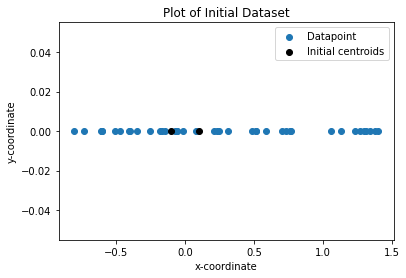

In [ ]:
plot_dataset(rand_dataset,centroids_1)

Performing K-means clustering on the dataset with the given centroids , printing the final centroids and SSE.

In [ ]:
output_arr = k_means_clustering(rand_dataset,num_clusters,centroids_1)

Final cluster centroids : 
(-0.23516010928927109, 0.0)
(0.9702846216096968, 0.0)


Sum of squared errors : 
4.319614466898836


Plotting the clusters along with their centoids.

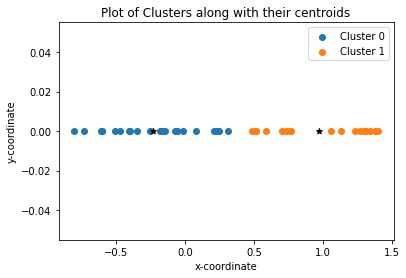

In [ ]:
plot_clusters(output_arr,num_clusters,centroids_1,"*")

Scanning and storing the given inputs(number of clusters and centroids).

Given centroids : (0,0) and (3.5,0) 

In [ ]:
input_arr = take_inputs(rand_dataset)
num_clusters = input_arr[0]
centroids_2 = input_arr[1]
init_cent_2 = np.copy(centroids_2)

Enter the number of clusters : 2
Do you want to enter centroids ? (Y/n) : y
Enter x coordinate of centroid : 0
Enter y coordinate of centroid : 0
Enter x coordinate of centroid : 3.5
Enter y coordinate of centroid : 0


Initial centroids are as follows : 
(0.0, 0.0)
(3.5, 0.0)


Plotting the generated data set with initial centroids

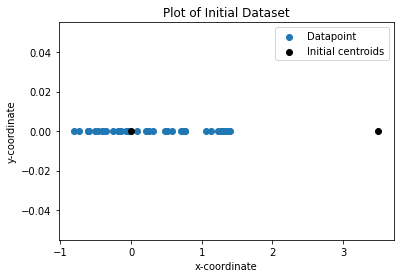

In [ ]:
plot_dataset(rand_dataset,centroids_2)

Performing K-means clustering on the dataset with the given centroids , printing the final centroids and SSE.

In [ ]:
output_arr = k_means_clustering(rand_dataset,num_clusters,centroids_2)

Final cluster centroids : 
(0.9702846216096968, 0.0)
(-0.23516010928927109, 0.0)


Sum of squared errors : 
4.319614466898836


Plotting the clusters along with their centoids.

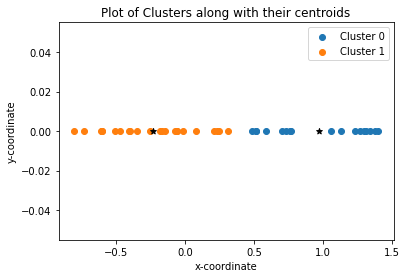

In [ ]:
plot_clusters(output_arr,num_clusters,centroids_2,"*")

(b)Adding a random point to the dataset and peforming k-means on the dataset.

In [ ]:
x = np.random.uniform(3,4)#generating a random number between 3,4 and adding it to the dataset.
point = [(x,0)]
rand_dataset = np.append(rand_dataset,point,axis = 0)
rand_dataset.shape

(41, 2)

Plotting the generated data set with initial centroids(centroids_1)

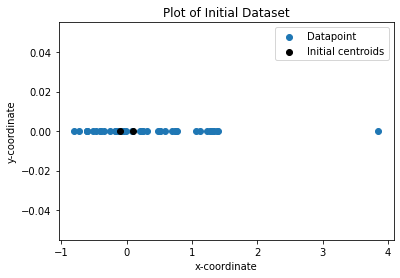

In [ ]:
plot_dataset(rand_dataset,init_cent_1)

Plotting the generated data set with initial centroids(centroids_2)

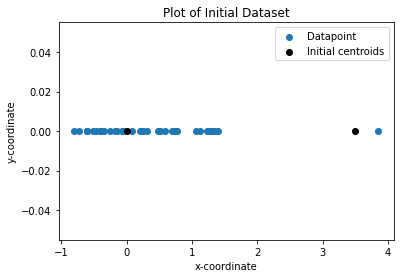

In [ ]:
plot_dataset(rand_dataset,init_cent_2)

Performing K-means clustering on the dataset with the given centroids , printing the final centroids and SSE.(using centroids_1)

In [ ]:
output_arr = k_means_clustering(rand_dataset,num_clusters,init_cent_1)

Final cluster centroids : 
(-0.23516010928927109, 0.0)
(1.1304226328707, 0.0)


Sum of squared errors : 
12.166734357991405


Plotting the clusters along with their centoids.(centroids_1)

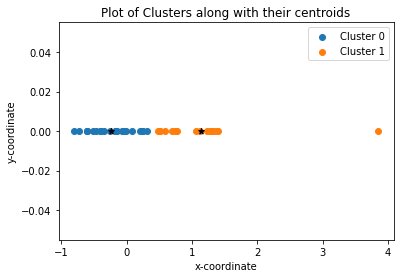

In [ ]:
plot_clusters(output_arr,num_clusters,init_cent_1,"*")

Performing K-means clustering on the dataset with the given centroids , printing the final centroids and SSE.(using centroids_2)

In [ ]:
output_arr = k_means_clustering(rand_dataset,num_clusters,init_cent_2)

Final cluster centroids : 
(0.27715390134279017, 0.0)
(3.852768824307761, 0.0)


Sum of squared errors : 
18.523637634587963


Plotting the clusters along with their centoids.(centroids_2)

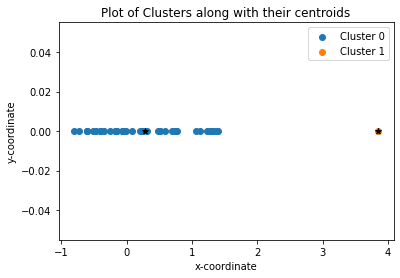

In [ ]:
plot_clusters(output_arr,num_clusters,init_cent_2,"*")

The clusters were not found correctly when the extra data point was added in the second plot.

###**Q3.Kids,Adults and Aliens**###

Generating dataset from the given table.

In [ ]:
#x -> height,y -> weight
dataset = np.zeros((250,2))
x = np.random.normal(5,1.1,100)
y = np.random.normal(60,7,100)
for i in range(100):
  dataset[i][0] = x[i]
  dataset[i][1] = y[i]

x = np.random.normal(3,1,100)
y = np.random.normal(30,5,100)
for i in range(100,200):
  dataset[i][0] = x[i-100]
  dataset[i][1] = y[i-100]

x = np.random.normal(7,1,50)
y = np.random.normal(40,2,50)
for i in range(200,250):
  dataset[i][0] = x[i-200]
  dataset[i][1] = y[i-200]

Scanning and storing the given inputs(number of clusters and centroids).
Centroids are generated randomly from the given dataset.

In [ ]:
input_arr = take_inputs(dataset)
num_clusters = input_arr[0]
centroids = input_arr[1]
initial_cent = np.copy(centroids)

Enter the number of clusters : 3
Do you want to enter centroids ? (Y/n) : n


Initial centroids are as follows : 
(3.982754475763694, 55.95431927157889)
(4.623845233130084, 61.844139334003124)
(6.212987262221947, 67.03949041900121)


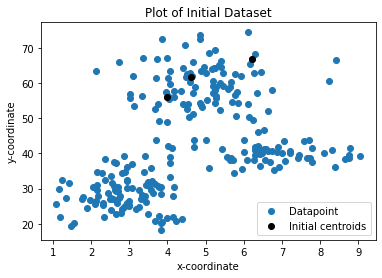

In [ ]:
plot_dataset(dataset,centroids)

In [ ]:
output_arr = k_means_clustering(dataset,num_clusters,centroids)

Final cluster centroids : 
(4.205068445966576, 32.270105171487124)
(5.045605013154904, 52.83161374764312)
(5.00407092471508, 64.30498095741095)


Sum of squared errors : 
9006.060286493932


4(a) Plotting the SSE vs iteration numbers.

No handles with labels found to put in legend.


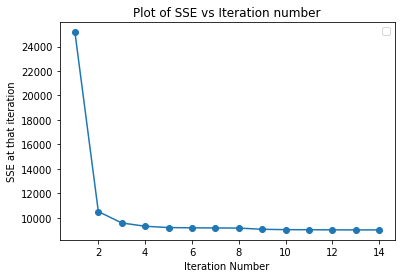

In [ ]:
plot_SSE(output_arr)

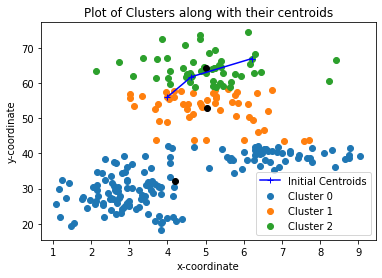

In [ ]:
plt.plot(initial_cent[:,0],initial_cent[:,1],marker = "+",c = "blue",label = "Initial Centroids")
plot_clusters(output_arr,num_clusters,centroids)

4(b) Doing the same as above for the second time with different initial centroids.

In [ ]:
input_arr = take_inputs(dataset)
num_clusters = input_arr[0]
centroids = input_arr[1]
initial_cent = np.copy(centroids)

Enter the number of clusters : 3
Do you want to enter centroids ? (Y/n) : n


Initial centroids are as follows : 
(3.4922307275801923, 31.980439154972025)
(1.4330767656877275, 31.721066984674508)
(3.5633850330987267, 35.81291032870246)


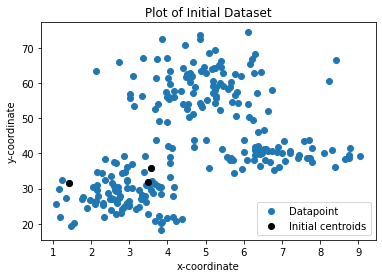

In [ ]:
plot_dataset(dataset,centroids)

In [ ]:
output_arr = k_means_clustering(dataset,num_clusters,centroids)

Final cluster centroids : 
(5.857959360610699, 39.78495162140085)
(2.8586937339399214, 27.088544547162762)
(4.933761724610895, 60.27092278839003)


Sum of squared errors : 
5363.047180760699


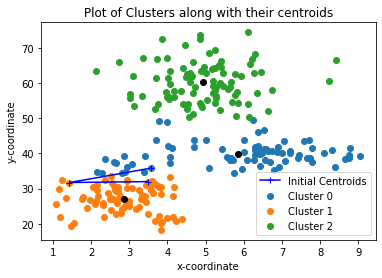

In [ ]:
plt.plot(initial_cent[:,0],initial_cent[:,1],marker = "+",c = "blue",label = "Initial Centroids")
plot_clusters(output_arr,num_clusters,centroids)

As shown above,in both cases with different initial centroids,distinct and different clusters were formed.

3(c).I would compare the SSEs of all the clustering results and choose the clustering result with lowest SSE.

3(d).We can choose the initial centroids such that each centroid belongs to each of the given groups(kids,adults and aliens).This might result in formation of same clusters over successive runs over the same dataset. 

###**Q4.K-means clustering on dataset.csv**###

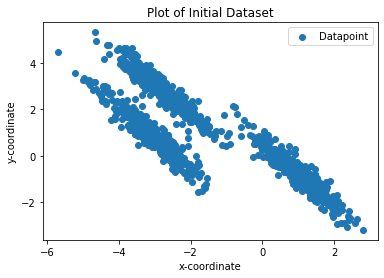

In [ ]:
plt.scatter(X[:,0],X[:,1],label = "Datapoint")
plt.title("Plot of Initial Dataset")
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.legend()
plt.show()

Assuming k = 3...

4(a) Running k-means algorithm on the given dataset.

Scanning and storing the given inputs(number of clusters and centroids).

In [ ]:
input_arr = take_inputs(X)
num_clusters = input_arr[0]
centroids = input_arr[1]
initial_cent = np.copy(centroids)

Enter the number of clusters : 3
Do you want to enter centroids ? (Y/n) : n


Initial centroids are as follows : 
(-2.6510000000000002, 2.846)
(-2.741, 2.519)
(-3.62, 1.261)


Performing K-means clustering on the dataset with the given centroids , printing the final centroids and SSE.

In [ ]:
output_arr = k_means_clustering(X,num_clusters,centroids)

Final cluster centroids : 
(-3.3033935860058277, 2.886979591836734)
(1.0418788819875773, -0.8677453416149065)
(-2.5272208955223876, 0.7970000000000002)


Sum of squared errors : 
1116.2193177711729


Plotting the clusters along with their centoids.

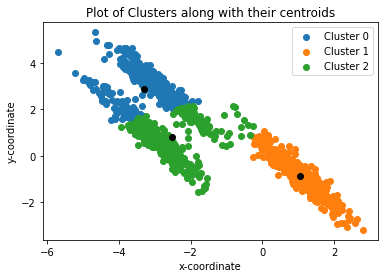

In [ ]:
plot_clusters(output_arr,num_clusters,centroids)

The clusters formed were not as expected due to the way k means clustering algorithm works.The centroids are formed by comparing their distances from the data points.If the 3 groups of points were a bit far from each other,then we might expect the clusters to be different. 

4(b)Running k-means from k = 2 to k = 10.

In [ ]:
SSE = []
it = []
for i in range(2,11):
  centroids = X[np.random.choice(X.shape[0],i,replace=False)] 
  output_arr = k_means_clustering(X,i,centroids)
  print("\n")
  SSE.append(output_arr[2])
  it.append(i)

Final cluster centroids : 
(0.9058592375366571, -0.8450967741935477)
(-2.963726858877086, 1.9210819423368743)


Sum of squared errors : 
1918.4684234595634


Final cluster centroids : 
(1.0418788819875773, -0.8677453416149065)
(-3.3064574780058624, 2.8927653958944273)
(-2.5287270029673588, 0.8035489614243325)


Sum of squared errors : 
1116.2616415859216


Final cluster centroids : 
(-2.8705592105263174, 1.841526315789474)
(1.0460155763239873, -0.8730903426791273)
(-3.568889473684211, 3.3993789473684206)
(-2.3201621621621618, 0.2830864864864863)


Sum of squared errors : 
904.1732331719529


Final cluster centroids : 
(-2.303716129032258, 0.15392903225806448)
(-2.256404494382022, 2.170280898876405)
(-3.565450292397661, 3.491502923976609)
(-3.494634285714285, 1.433491428571429)
(1.0460155763239873, -0.8730903426791273)


Sum of squared errors : 
740.2836052701258


Final cluster centroids : 
(-0.11406410256410258, 0.5612564102564103)
(0.8756513157894736, -0.6294671052631579)
(-3.6071129

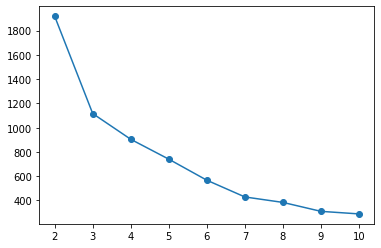

In [ ]:
plt.scatter(it,SSE)
plt.plot(it,SSE)

I would select the k where the SSE decreases sharply and after which,the decrease is not so drastic.In the above graph,there is a sharp decrease from k = 2 to k = 3.So I would choose k = 3 as my value of k.